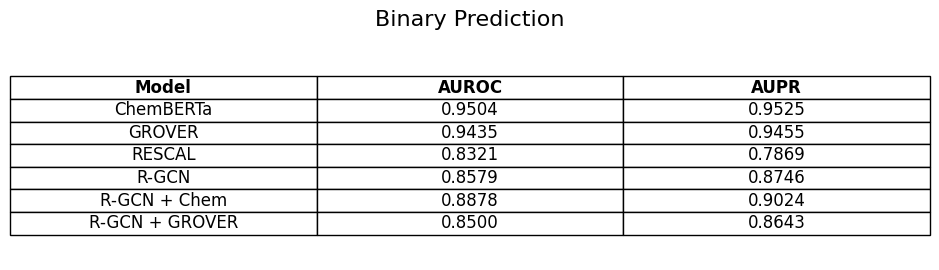

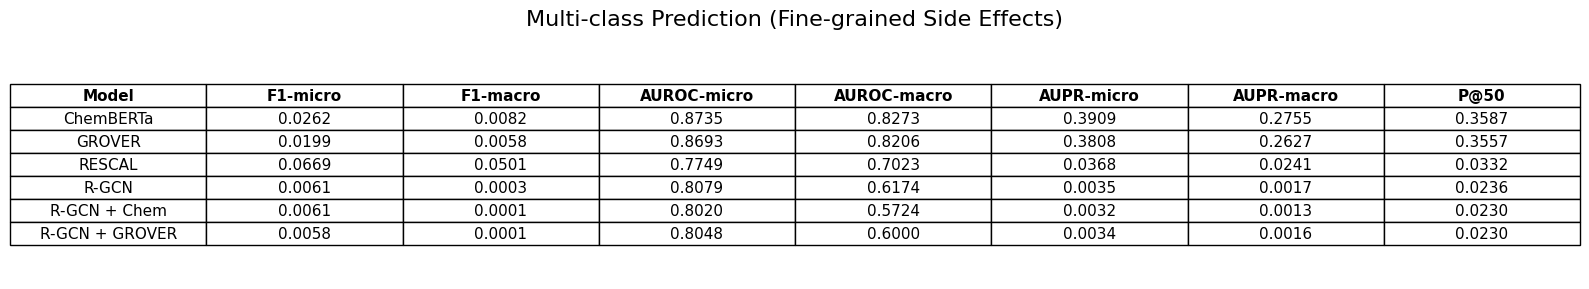

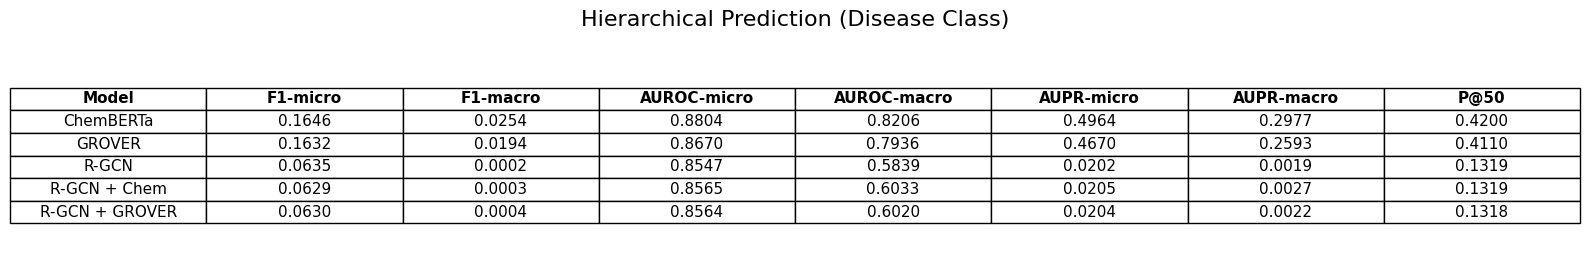

In [7]:
import pandas as pd
import matplotlib.pyplot as plt

def plot_table(df: pd.DataFrame, title: str, float_fmt: str = "{:.4f}",
               figsize=(14, 3.2), font_size=12, save_path=None):
    """
    Render a pandas DataFrame as a clean matplotlib table figure.
    """
    df_show = df.copy()

    # format floats
    for c in df_show.columns:
        if c != "Model":
            df_show[c] = df_show[c].apply(lambda x: float_fmt.format(x))

    fig, ax = plt.subplots(figsize=figsize)
    ax.axis("off")
    ax.set_title(title, fontsize=16, pad=18)

    table = ax.table(
        cellText=df_show.values,
        colLabels=df_show.columns,
        cellLoc="center",
        colLoc="center",
        loc="center",
    )

    table.auto_set_font_size(False)
    table.set_fontsize(font_size)
    table.scale(1, 1.4)

    # bold header row
    for (r, c), cell in table.get_celld().items():
        if r == 0:
            cell.set_text_props(weight="bold")

    plt.tight_layout()
    if save_path is not None:
        plt.savefig(save_path, dpi=300, bbox_inches="tight")
    plt.show()


# ===== 1) Binary =====
binary_df = pd.DataFrame([
    ["ChemBERTa",      0.9504, 0.9525],
    ["GROVER",         0.9435, 0.9455],
    ["RESCAL",         0.8321, 0.7869],
    ["R-GCN",          0.8579, 0.8746],
    ["R-GCN + Chem",   0.8878, 0.9024],
    ["R-GCN + GROVER", 0.8500, 0.8643],
], columns=["Model", "AUROC", "AUPR"])

plot_table(
    binary_df,
    title="Binary Prediction",
    float_fmt="{:.4f}",
    figsize=(9.5, 2.8),
    font_size=12,
    save_path=None  # e.g., "binary_table.png"
)


# ===== 2) Multi-class (Fine-grained) =====
multi_df = pd.DataFrame([
    ["ChemBERTa",      0.0262, 0.0082, 0.8735, 0.8273, 0.3909, 0.2755, 0.3587],
    ["GROVER",         0.0199, 0.0058, 0.8693, 0.8206, 0.3808, 0.2627, 0.3557],
    ["RESCAL",         0.0669, 0.0501, 0.7749, 0.7023, 0.0368, 0.0241, 0.0332],
    ["R-GCN",          0.0061, 0.0003, 0.8079, 0.6174, 0.0035, 0.0017, 0.0236],
    ["R-GCN + Chem",   0.0061, 0.0001, 0.8020, 0.5724, 0.0032, 0.0013, 0.0230],
    ["R-GCN + GROVER", 0.0058, 0.0001, 0.8048, 0.6000, 0.0034, 0.0016, 0.0230],
], columns=[
    "Model", "F1-micro", "F1-macro",
    "AUROC-micro", "AUROC-macro",
    "AUPR-micro", "AUPR-macro",
    "P@50"
])

plot_table(
    multi_df,
    title="Multi-class Prediction (Fine-grained Side Effects)",
    float_fmt="{:.4f}",
    figsize=(16, 3.0),
    font_size=11,
    save_path=None  # e.g., "multi_table.png"
)


# ===== 3) Hierarchical (Disease Class) =====
hier_df = pd.DataFrame([
    ["ChemBERTa",      0.1646, 0.0254, 0.8804, 0.8206, 0.4964, 0.2977, 0.4200],
    ["GROVER",         0.1632, 0.0194, 0.8670, 0.7936, 0.4670, 0.2593, 0.4110],
    ["R-GCN",          0.0635, 0.0002, 0.8547, 0.5839, 0.0202, 0.0019, 0.1319],
    ["R-GCN + Chem",   0.0629, 0.0003, 0.8565, 0.6033, 0.0205, 0.0027, 0.1319],
    ["R-GCN + GROVER", 0.0630, 0.0004, 0.8564, 0.6020, 0.0204, 0.0022, 0.1318],
], columns=[
    "Model", "F1-micro", "F1-macro",
    "AUROC-micro", "AUROC-macro",
    "AUPR-micro", "AUPR-macro",
    "P@50"
])

plot_table(
    hier_df,
    title="Hierarchical Prediction (Disease Class)",
    float_fmt="{:.4f}",
    figsize=(16, 2.8),
    font_size=11,
    save_path=None  # e.g., "hier_table.png"
)